# Examining business cycles and optimal monetary policy in a regional DSGE model -- Sacha Gelfer 2024

[論文リンク](https://www.sciencedirect.com/science/article/pii/S0264999324001068)
[データセット](https://data.mendeley.com/datasets/ph47c6gcpx/1)

## Figures

In [1]:
using CairoMakie

In [3]:
using CSV, DataFrames

### Annual Growth

In [24]:
df = CSV.read("C:/Users/ikuto/OneDrive/デスクトップ/Research/Research_code/MacroModeling/data/regionalDSGE/DataA.csv", DataFrame)
first(df, 5)

Row,DATE,NE GDP Def,S GDP Def,MW GDP Def,W GDP Def,NE Real GDP,S Real GDP,MW Real GDP,W Real GDP,National Real GDP,NE Cons,S Cons,MW Cons,W Cons,National Consumption,NE Inv,S Inv,MW Inv,W Inv,National Investment,NE CNP,S CNP,MW CNP,W CNP,National CNP
,Date,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64?,Float64?,Float64?,Float64?,Float64,Float64?,Float64?,Float64?,Float64?,Float64,Float64,Float64,Float64,Float64,Float64
1,1997-01-01,73.5608,70.7629,72.9376,75.7856,2.54418e6,3.90546e6,2.66501e6,2.5494e6,11521.9,1.19644e6,1.8134e6,1.27454e6,1.24972e6,5536.79,4.67295e5,556358.0,4.55436e5,4.1881e5,1595.6,4.05353e7,7.23951e7,4.77796e7,4.46696e7,2.0538e8
2,1998-01-01,74.8388,71.6509,74.2588,76.2448,2.60838e6,4.0983e6,2.75389e6,2.70625e6,12038.3,1.26797e6,1.92726e6,1.34562e6,1.33344e6,5877.25,4.67389e5,5.99149e5,4.78038e5,452638.0,1736.67,4.101e7,7.45577e7,4.83945e7,4.63638e7,2.10326e8
3,1999-01-01,75.8751,73.0008,75.5315,77.1367,2.71884e6,4.27502e6,2.84852e6,2.89107e6,12610.5,1.34826e6,2.06086e6,1.43156e6,1.43498e6,6279.08,4.86314e5,6.27191e5,4.86708e5,5.02447e5,1887.06,4.12284e7,7.55257e7,4.87046e7,4.71336e7,2.12592e8
4,2000-01-01,77.2225,75.2932,76.9829,78.5761,2.84767e6,4.39108e6,2.94459e6,3.07267e6,13131.0,1.44833e6,2.22263e6,1.53082e6,1.55682e6,6762.14,5.11202e5,6.26409e5,4.88395e5,5.4471e5,2038.41,4.14995e7,7.65743e7,4.90554e7,4.79801e7,2.15109e8
5,2001-01-01,79.0333,77.322,79.0387,80.1182,2.89274e6,4.4745e6,2.9224e6,3.0701e6,13262.1,1.51701e6,2.32714e6,1.59073e6,1.627e6,7065.63,518832.0,6.51903e5,4.58432e5,4.97845e5,1934.84,4.1776e7,7.7639e7,4.93873e7,4.87728e7,2.17575e8


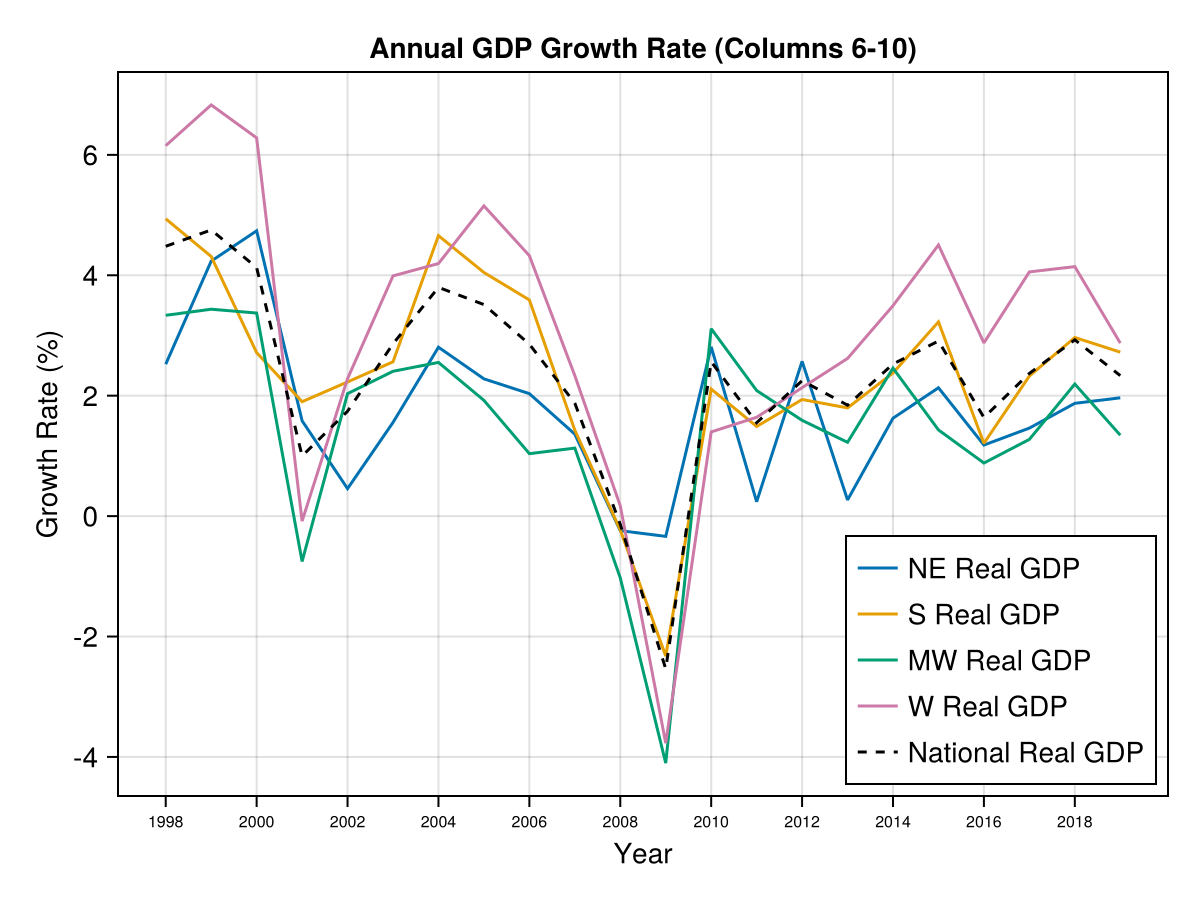

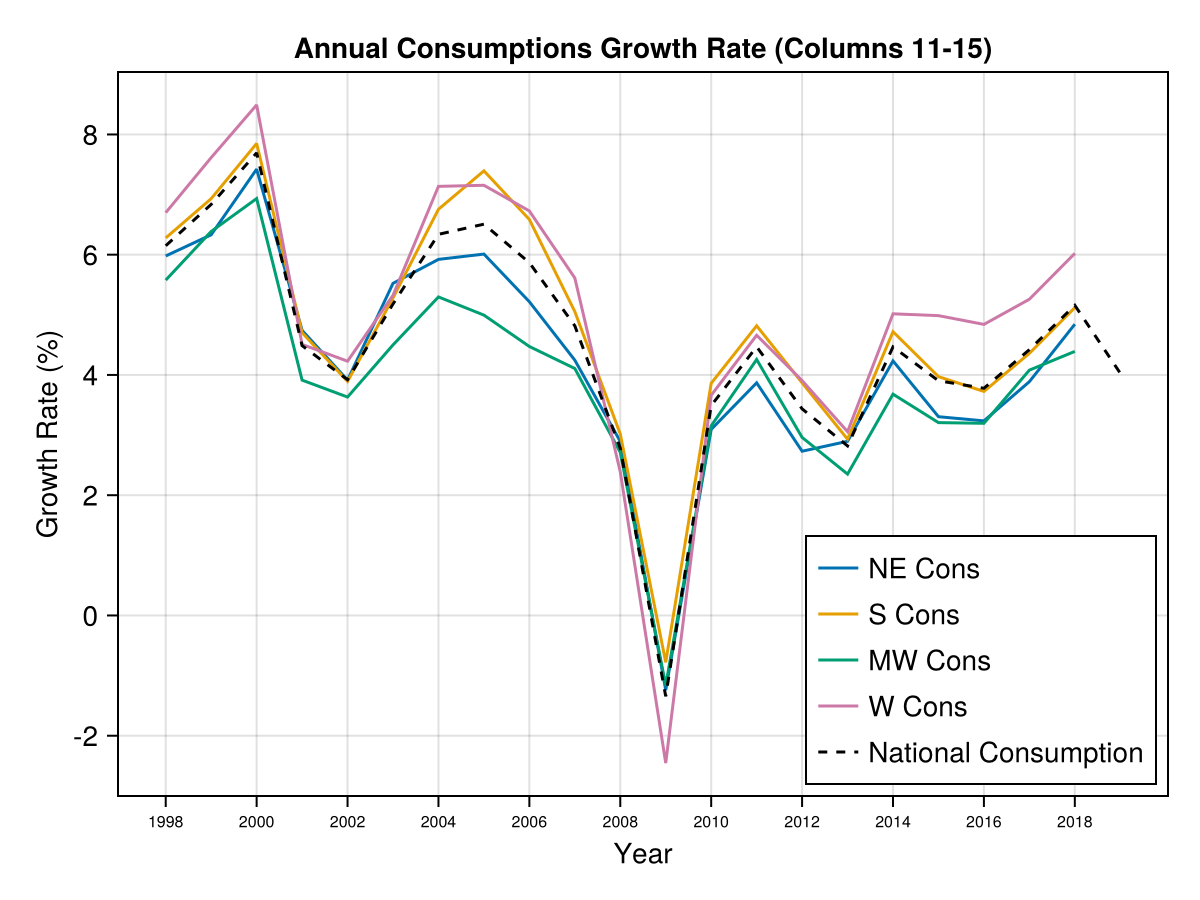

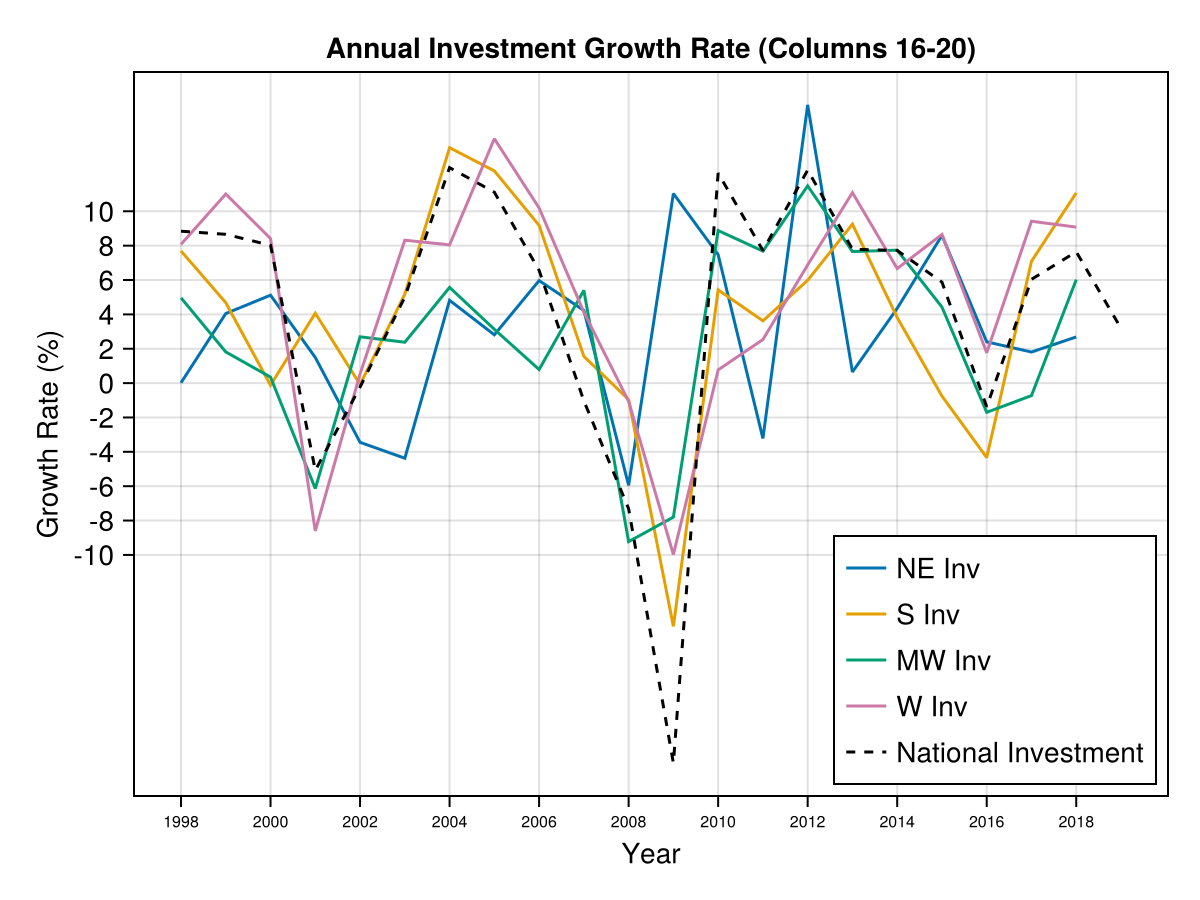

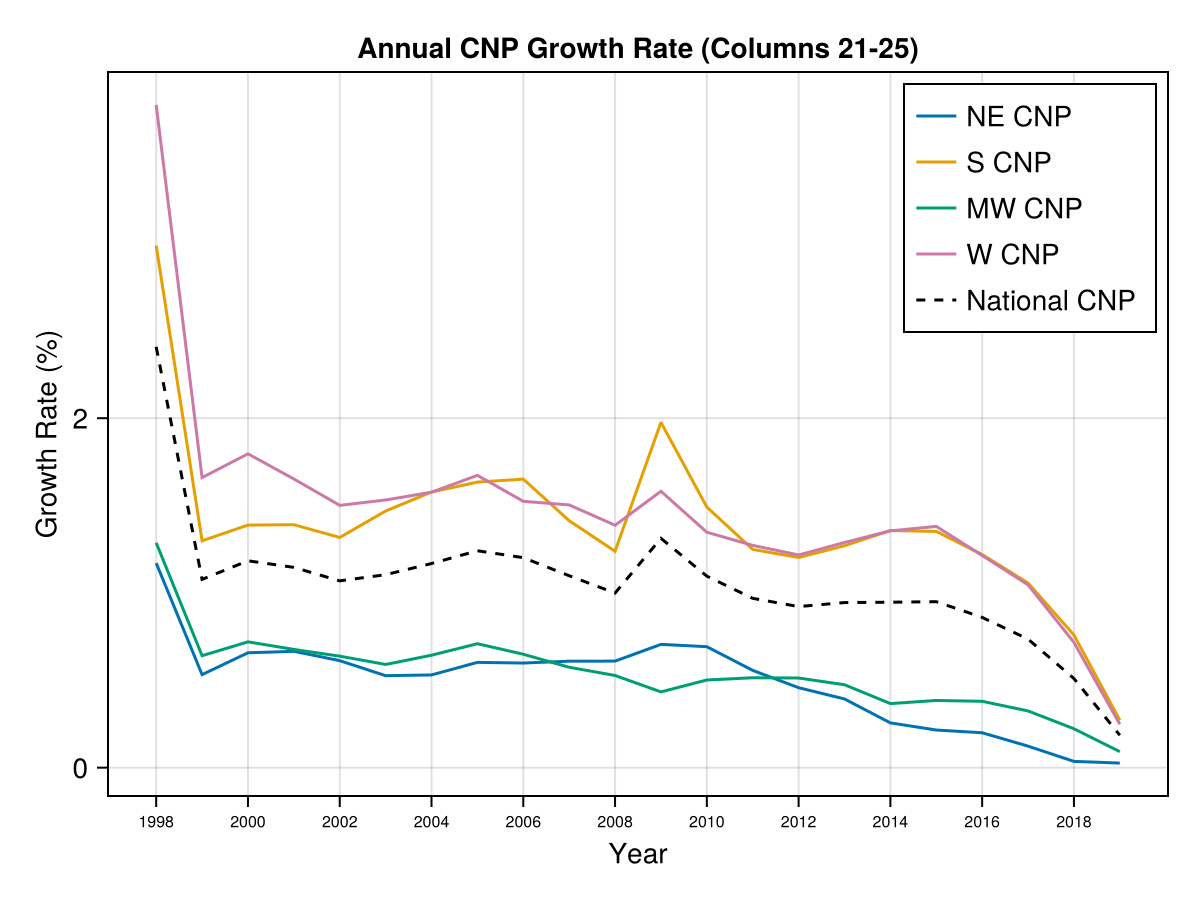

CairoMakie.Screen{IMAGE}


In [45]:
using Dates

years = year.(df.DATE)

# グループごとのカラム名リスト
cols06_10 = names(df)[6:10]
cols11_15 = names(df)[11:15]
cols16_20 = names(df)[16:20]
cols21_25 = names(df)[21:25]

function plot_growth(cols, title)
    growth = DataFrame(Year = years[2:end])
    for col in cols
        growth[!, col] = 100 .* (df[2:end, col] .- df[1:end-1, col]) ./ df[1:end-1, col]
    end

    fig = Figure()
    xtick_positions = collect(years[2]:2:years[end])
    xtick_labels = string.(xtick_positions)

    ax = Axis(fig[1, 1],
        title = title,
        xlabel = "Year",
        ylabel = "Growth Rate (%)",
        xticks = (xtick_positions, xtick_labels),
        yticks = (-10:2:10, string.(-10:2:10)),
        xticklabelsize = 8
    )

    for col in cols
        if col == "National Real GDP"
            lines!(ax, growth.Year, growth[!, col], label = col, linestyle = :dash, color = :black)
        elseif col == "National Consumption"
            lines!(ax, growth.Year, growth[!, col], label = col, linestyle = :dash, color = :black)
        elseif col == "National Investment"
            lines!(ax, growth.Year, growth[!, col], label = col, linestyle = :dash, color = :black)
        elseif col == "National CNP "
            lines!(ax, growth.Year, growth[!, col], label = col, linestyle = :dash, color = :black)
        else
            lines!(ax, growth.Year, growth[!, col], label = col)
        end
    end

    if any(strip.(cols) .== "National CNP")
        axislegend(ax, position = :rt, fontsize = 10)
    else
        axislegend(ax, position = :rb, fontsize = 10)
    end
    display(fig)
end

plot_growth(cols06_10, "Annual GDP Growth Rate (Columns 6-10)")
plot_growth(cols11_15, "Annual Consumptions Growth Rate (Columns 11-15)")
plot_growth(cols16_20, "Annual Investment Growth Rate (Columns 16-20)")
plot_growth(cols21_25, "Annual CNP Growth Rate (Columns 21-25)")

# for文で複数のグラフは描きにくい